# Introducción a Python para ciencias e ingenierías (clase 8)


Ing. Martín Gaitán

- Twitter: `@tin_nqn_`
- Email: gaitan@gmail.com


**Anotate en las listas de correo**

- python.org.ar  (Python General -- Tod@s!)
- scipyla.org   (Python Científico - en portuñol/ingles)


## Seaborn

Antes de empezar con pandas vamos a configurar [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), un paquete que, entre otras cosas, mejora la estética de gráficos de matplotlib

Para instalar, como casi siempre

    conda install seaborn
      
o 

    pip install seaborn
    

Veamos un gráfico default generado por matplotlib

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

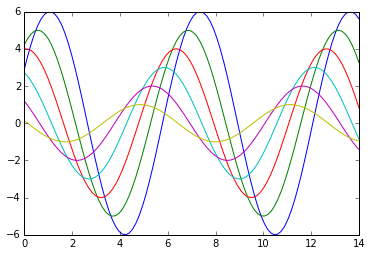

In [3]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

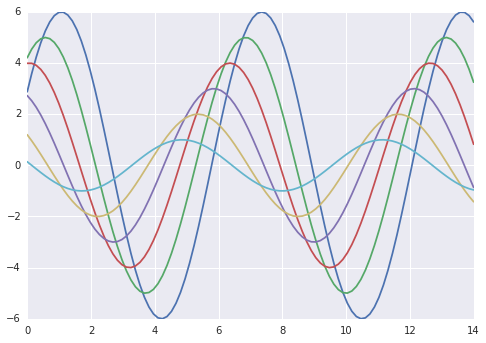

In [4]:
import seaborn as sns   # magia !
sinplot()

Seaborn permite configurar paletas, estilos de una manera muy fácil, globalmente o para un gráfico en particular

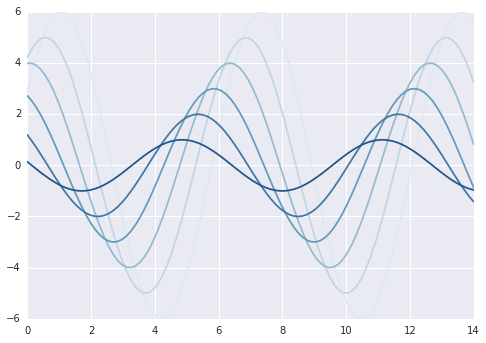

In [5]:
with sns.color_palette("Blues", desat=.7):
    sinplot()

Al ser un paquete especialmente diseñado para **estadística**, además de gráficos más lindos, tiene **gráficos especiales** e incorpora "datesets" de prueba

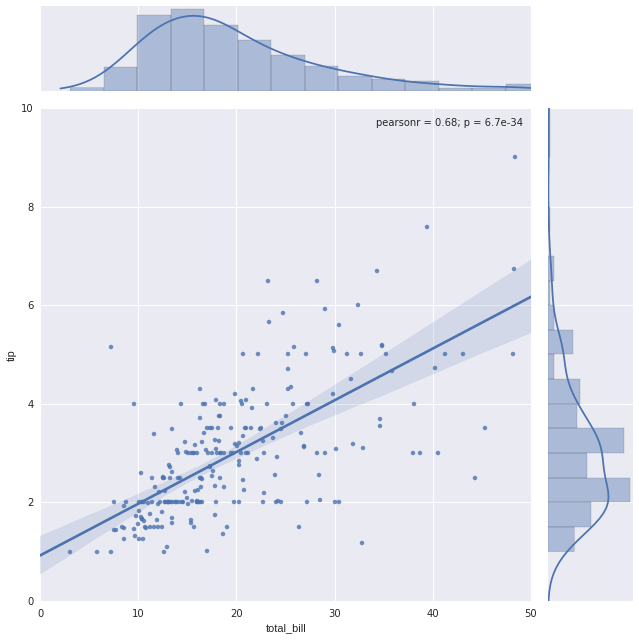

In [6]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 50), ylim=(0, 10), size=9)


¿Y qué ese dataset? Veamos

In [7]:
type(tips)

pandas.core.frame.DataFrame


## Pandas


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones. 

Puede pensarse a Pandas como un **reemplazo pythonico a excel**


Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  


In [8]:
import pandas as pd

### Series

Un Series es un objeto **unidemensional**, similar a un array, una lista o una columna en una tabla, que tiene **asociado una etiqueta** para cada elemento. Por defecto, esta etiqueta es un número de 0 a N

In [9]:
s = pd.Series([1,3,5,np.nan,6,8]) # creamos una serie, analogo a un array de 1D
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

Como vemos, es simplemente un envoltorio más lindo: el verdadero contenedor es un array de numpy

In [10]:
s.values

array([  1.,   3.,   5.,  nan,   6.,   8.])

In [11]:
s.values.ndim, s.values.shape

(1, (6,))

También podemos ver que nos generó el **indice** con claves default. 

In [12]:
s.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [13]:
s[0]

1.0

En este caso ocurre que el índice y las claves son lo mismo, pero esto puede no ocurrir para objetos más completos

In [14]:
s.keys() is s.index

True

Por eso, la manera más genérica y recomendada para indizar elementos es usar el `.ix`

In [15]:
s.ix[0]

1.0

¿Pero entonces una Serie es un array?. Bueno, en realidad es más parecido a un diccionario ordenado

In [16]:
s[-1]

KeyError: -1

Hay muchas operaciones que podemos hacer sobre una serie.

In [17]:
s.mean(), s.sum(), s.std()

(4.5999999999999996, 23.0, 2.7018512172212592)

E incluso ver un resumen general de los datos

In [18]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Como vemos, es un poco más permisivo que Numpy con los datos faltantes (ese `nan` que hay por allí)

In [19]:
s.values.mean(), s.values.sum(), s.values.std()

(nan, nan, nan)

Y hay operaciones que no están disponibles en numpy o se comportan distinto

In [20]:
s.median()

5.0

In [21]:
s.values.median() # np.median(s.values)

AttributeError: 'numpy.ndarray' object has no attribute 'median'

Pandas es una herramienta nacida en la industria de las finanzas, y por ello intenta hacer fácil las cosas tipicas. Una de ellas es **graficar datos**. Utiliza **matplotlib** por default

In [ ]:
s.plot()

In [ ]:
s.plot('pie', table=True)

In [ ]:
s.plot('barh', grid=False, title='Serie de datos', colormap='Blues_r')

Como dijimos, los valores de una serie tienen una etiqueta y se pueden definir explicitamente

In [ ]:
goles = pd.Series([10, 54, 31, 0], ['gaitan', 'messi', 'suarez', 'ronaldo'])
goles

Cuando las claves están definias explicitamente, funcionan como un diccionario ordenado (es decir, se puede acceder por clave o posicición

In [ ]:
goles['messi']

In [ ]:
goles[-1]

Obviamente, se puede instanciar una serie directamente desde un diccionario. 



In [ ]:
pd.Series({'gaitan': 80, 'messi': 100})

Pero a diferencia de un diccionario, las etiquetas se pueden repetir. Es decir que pueden haber multiples valores para una clave

In [ ]:
s = pd.Series(np.random.rand(4) * 100, ['gaitan', 'messi', 'maradona', 'messi'])
s['messi']

In [ ]:
s.plot('bar')

La series se utilizan mucho para representar datos en función del tiempo. Hay una función especial análoga a `range()` que permite generar índices temporales

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

In [ ]:
ts.index

### Dataframe

Un DataFrame es una estructura tabular de **filas y columnas** (¡como una hoja de cálculo!). También se puede pensar un DataFrame como un conjunto de Series que comparten el índice (es decir, la primera columna)

In [ ]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df.head()

In [ ]:
df.tail()

Las columnas son Series!

In [ ]:
type(df.A)

In [ ]:
df.A.mean()

Se puede instanciar un DataFrame a partir de un diccionario. 

In [ ]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=range(4),dtype='float32'),
                     'D': np.array([3] * 4,dtype='int32'),
                     'E': 'foo' })
df2

In [ ]:
df2[['B','C']]

Pandas tambien puede importar archivos CSV o Excel, locales o remotos. Por ejemplo este [dataset](https://github.com/rjtavares/football-crunching/blob/master/datasets/cl-shots-2012.csv) de remates al arco en la Champions League

In [ ]:
url = 'https://raw.githubusercontent.com/rjtavares/football-crunching/master/datasets/cl-shots-2012.csv'
shots = pd.read_csv(url, index_col=0, na_values='N/A')

In [ ]:
shots.columns

In [ ]:
shots.head()

Podemos filtrar el dataset por múltiples criterios. Por ejemplo, para calcular la distancia promedio de los goles que hizo el genio:

In [ ]:
shots[(shots.player == 'Lionel Messi') & shots.goal].dist.mean()

Podemos separar subconjuntos basado en uno o más criterios

In [ ]:
shots.groupby('team').describe()  # es lo mismo shots.groupby(shots['team']).describe() 

In [ ]:
shots.groupby(['team', 'goal'])['dist']   # groupby devuelve un iterador especial *similar* al dataframe

Una alternativa aún más poderosa es usar pivot, donde uno define una o multples filas y columnas para agrupar datos, ya las columnas (values) que quiere ver resumidas. La función de agregación por defecto para es `np.mean`

In [ ]:
pt1 = pd.pivot_table(shots, index=['team'], columns=['goal'], values=['dist'])
pt1

como siempre, podemos graficar

In [ ]:
pt1.plot(kind='bar', figsize=(13,6))

En los dataframes resultantes de un pivot, índice y claves no son lo mismo

In [ ]:
pt1.index is pt1.keys()

In [ ]:
pt1['Barcelona']

In [ ]:
pt1.ix['Barcelona']

In [ ]:
tip

Las tablas pivoteantes son mucho más poderosas

In [ ]:
pt2 = pd.pivot_table(shots, index=['team', 'player'], columns=['goal'], values=['dist', 'x', 'y'])
pt2

Notar que en este caso usamos un índice compuesto (team-player). Esto hace que el dataframe utilice un tipo de índice especial llamado `MultiIndex`

In [ ]:
pt2.ix['Barcelona']

Podemos conseguir la fila particular para un índice compuesto

In [ ]:
pt2.ix[('Barcelona', 'Lionel Messi')]

Y ahora podemos volver al dataset `tips` importado de Seaborn

In [ ]:
tips.head()

In [ ]:
tips.pivot_table(index=['day', 'sex'], columns=['time', 'smoker'], values=['total_bill', 'tip'])

Y ya que estamos, veamos los gráficos facetados

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip")
g.add_legend();

Pandas es una herramienta poderosísima y sólo vimos un poquito. ¡A estudiarlo!

------------

# Python es infinito: Instalando paquetes


Python es un lenguaje utilizado en muchísimas áreas. El repositorio donde se suelen compartir paquetes se llama PyPi, el Python Package Index. 

**Desafío**: elijan un tópico cualquiera y busquemos un paquete para instalar

In [ ]:
from IPython.display import IFrame
IFrame('https://pypi.python.org/pypi', '100%', 400)

La herramienta oficial para instalar paquetes es [pip](https://pip.pypa.io/en/stable/). La forma canónica es

    pip install --user <nombre_paquete>

(el flag `--user` (opcional) instala el paquete a nivel usuario, sin requerir permisos de adminitracion)

In [ ]:
!pip install --help

Pip busca, baja, descomprime, e instala (y repite los pasos recursivamente para las dependencias). Por ejemplo, podemos instalar [pint](http://pint.readthedocs.org/en/0.6/tutorial.html), del amigo [Hernán Greco](http://www.conicet.gov.ar/hernan-grecco-la-alfabetizacion-cientifica-es-tan-importante-como-la-alfabetizacion-tradicional/)

(Nota: esto no va a funcionar en `try.jupyter.org` debido a las limitaciones de salida de red por cuestiones de seguridad)

In [ ]:
!pip install pint

In [ ]:
import pint 
ur = pint.UnitRegistry()

In [ ]:
vel = 60 * ur.km / ur.hr
vel

In [ ]:
vel.to('m/s')

Pero **¿dónde se instala un paquete?**. Si no le decimos lo contrario con algun parámetro del instalador, el paquete se descromprime y se copia a un directorio especial para Python llamado `site-packages`, que a su vez se encuentra en una **lista de directorios** (definida como una variable de entorno del sistema) en la que la maquinaria de importanción de Python busca paquetes

In [ ]:
pint.__file__

In [ ]:
import sys
sys.path

Para desintalar paquetes, el subcomando de pip es `uninstall`

In [ ]:
!pip uninstall -y pint

Notaron ese directorio ".virtualenvs" que se lee en mi sys.path?  Es que yo estoy usando un **entorno virtual**

### Entornos virtuales

Un entorno virtual (virtualenv) en python es una compartimentalización para tener multiples conjuntos de **dependencias por proyecto**, instalándolas en un directorio particular. Es decir, podemos tener un virtualenv en el que usamos numpy 1.8 y no vernos obligado a actualizarlo si comenzamos otro para el que necesitamos una feature que aparece en numpy 2.0. 

Python 3 incorpora built-in una herramienta llamada [pyenv](https://docs.python.org/3/library/venv.html) para manejar entornos virtuales, pero la forma canónica sigue siendo utilizar la herramienta [virtuelenv](https://virtualenv.pypa.io/en/latest/)

 

Primero instalamos virtualenv

        pip install virtualenv   #  o pip install --user virtualenv

Para crear un virtualenv basta usar 

    virtualenv <DIR>
    
Donde `<DIR>` es el directorio donde queremos instalar las dependencias exclusivas para nuestro proyecto. En mi caso es `~/.virtualenvs/curso`


Una vez creado un virtualenv, cada vez que se quiere usarlo hay que activarlo. En sistemas linux/mac:

    source <DIR>/bin/activate 
    
o en sistemas windows: 

    <DIR>\Scripts\activate

Cuando el virtualenv está activado, se denotará por un prefijo en el prompt. Luego, podemos instalar paquetes directamente via pip, sin permisos de adminitrador, ya que estamos instalando los paquetes en el `site-packages` definido dentro del virtualenv. 



Para salir de un virtualenv (desactivarlo) se ejecuta

    deactivate

## Conda 

Un problema del tandem virtualenv-pip es que, en general, los paquetes instalables son archivos comprimidos de **código fuente**. Eso no es ningun problema cuando se trata de paquetes python puro, porque Python se interpreta y no se compila, pero cuando es un paquete que tiene dependencias externas (fortran, cython, c, etc.) o requiere dependencias complejas en el sistema operativo, la instalación via pip requerirá compilar, eso implica compiladores, headers y un montón de cosas que complican la vida (además de ser un proceso lento). 

Por eso la herramienta [conda](http://conda.pydata.org/), que viene preinstalada si usamos la distribución de python Anaconda, es muy interesante. En vez de bajar código fuente, baja paquetes precompilados (binarios) en un formato y desde un [repositorio especial](https://binstar.org/) (distinto a PyPi). 

Además, conda sabe crear por sí mismo entornos virtuales, es decir que es una mezcla entre virtualenv y pip. 


Para crear un entorno virtual via conda

    conda create -n <nombre_venv> <programas o paquetes basicos a instalar, opcionalmente con versiones>
    
Por ejemplo:

    conda create -n curso python=3.4 numpy scipy matplotlib pandas sympy seaborn ipython ipython-notebook

Para activar el entorno, es análogo a la manera de `virtualenv`

    source activate curso   
    
O en Windows, directamente 


    activate curso
    
Para instalar paquetes dentro del entorno, 

    conda install <paquetes o programas>
   


## Distribuyendo tus paquetes (o módulos)

Ya vimos algo de esto. Python usa un archivo especial llamado `setup.py` que invoca a una función llamada `setup()` con diversos parámetros que especifican de qué se trata el paquete, la versión, el autor, la lista explícita de  módulos y paquetes que debe incluir, etc.

Este *script* `setup.py` es llamado por python (directamente o a través de pip) y nos presenta una lista de subcomandos. 


Se nuevo sucede que Python trae incoporada lo necesario para escribir este archivo de setup, en el paquete `distutils` de la biblioteca estandar, pero la opción canónica superadora es usar el paquete [setuptools](https://setuptools.pypa.io/en/latest/index.html)


In [22]:
%mkdir test_pack/
%mkdir test_pack/marquesina

mkdir: no se puede crear el directorio «test_pack/»: El archivo ya existe
mkdir: no se puede crear el directorio «test_pack/marquesina»: El archivo ya existe


In [23]:
%cd test_pack

/home/tin/lab/curso-python-cientifico/test_pack


Supongamos que queremos distribuir nuestra [función maquesina](https://gist.githubusercontent.com/mgaitan/6319640/raw/68d4fc1b55407ce9e358b6769699e536eed5a4e1/gistfile1.txt) de la clase 2. Vamos a crear un paquete. Como es  nuestro único código, lo podemos poner directamente en el `__init__.py` del proyecto

In [24]:
%%writefile marquesina/__init__.py

def marquesina(cadena, ancho=60, alto=1, caracter="*"):
    """
    Wraps ``cadena`` in a box of ``caracter`` symbols with padding ``ancho`` x ``alto``
    """
    
    cadena = cadena.center(ancho)
    cadena = caracter + cadena[1:-1] + caracter
    cadena += '\n'
    relleno = " " * ancho
    relleno = caracter + relleno[1:-1] + caracter
    relleno += '\n'
    tapa = caracter * ancho
    return tapa + '\n' + relleno * alto + cadena + relleno * alto + tapa



Overwriting marquesina/__init__.py


Una versión mínima del `setup.py` se vería así

In [25]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.1',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),
)

Overwriting setup.py


Así se ve el árbol de archivos

In [26]:
!tree

.
├── dist
│   └── marquesina-0.2.tar.gz
├── marquesina
│   ├── __init__.py
│   └── __pycache__
│       └── __init__.cpython-34.pyc
├── marquesina.egg-info
│   ├── dependency_links.txt
│   ├── entry_points.txt
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   └── top_level.txt
├── Marquesina.egg-info
│   ├── dependency_links.txt
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   └── top_level.txt
└── setup.py

5 directories, 13 files


In [27]:
!python setup.py --help

Common commands: (see '--help-commands' for more)

  setup.py build      will build the package underneath 'build/'
  setup.py install    will install the package

Global options:
  --verbose (-v)      run verbosely (default)
  --quiet (-q)        run quietly (turns verbosity off)
  --dry-run (-n)      don't actually do anything
  --help (-h)         show detailed help message
  --no-user-cfg       ignore pydistutils.cfg in your home directory
  --command-packages  list of packages that provide distutils commands

Information display options (just display information, ignore any commands)
  --help-commands     list all available commands
  --name              print package name
  --version (-V)      print package version
  --fullname          print <package name>-<version>
  --author            print the author's name
  --author-email      print the author's email address
  --maintainer        print the maintainer's name
  --maintainer-email  print the maintainer's email address
  --co

Ahora podemos instalar nuestro paquete, por ejemplo via `pip install -e` que instala el paquete sin copiar el código a `site-packages`, permitiendo que si modificamos el código impacte automaticamente en la versión importable

In [28]:
!pip install -e .

Obtaining file:///home/tin/lab/curso-python-cientifico/test_pack
  Running setup.py (path:/home/tin/lab/curso-python-cientifico/test_pack/setup.py) egg_info for package from file:///home/tin/lab/curso-python-cientifico/test_pack
    deleting marquesina.egg-info/entry_points.txt
    
  Running setup.py develop for marquesina
    
    Creating /home/tin/.virtualenvs/curso/lib/python3.4/site-packages/marquesina.egg-link (link to .)
    marquesina 0.1 is already the active version in easy-install.pth
    
    Installed /home/tin/lab/curso-python-cientifico/test_pack
Cleaning up...


In [29]:
%cd test_pack/

[Errno 2] No such file or directory: 'test_pack/'
/home/tin/lab/curso-python-cientifico/test_pack


In [30]:
from marquesina import marquesina

In [31]:
print(marquesina('hola mundo'))

************************************************************
*                                                          *
*                        hola mundo                        *
*                                                          *
************************************************************


Supongamos que lanzamos una nueva versión que incopora otra función 

In [32]:
%%writefile marquesina/__init__.py

def marquesina(cadena, ancho=60, alto=1, caracter="*"):
    """
    Wraps ``cadena`` in a box of ``caracter`` symbols with padding ``ancho`` x ``alto``
    """
    
    cadena = cadena.center(ancho)
    cadena = caracter + cadena[1:-1] + caracter
    cadena += '\n'
    relleno = " " * ancho
    relleno = caracter + relleno[1:-1] + caracter
    relleno += '\n'
    tapa = caracter * ancho
    return tapa + '\n' + relleno * alto + cadena + relleno * alto + tapa

def boca():
    print(marquesina('¡Aguante Boca!'))


Overwriting marquesina/__init__.py


No haría falta cambiar el `setup.py` para importar el paquete o sus funciones, pero podemos usar una funcionalidad de `setuptools` que permite convertir funciones en simples programas de línea de comando instalables. 



In [33]:
%%writefile setup.py
from setuptools import setup, find_packages

setup(
    name='marquesina',
    version = '0.2',
    description='Marquesina, decorate your text',
    author='Martín Gaitán',
    author_email='curso@',
    packages = find_packages(),    # ['marquesina']
    entry_points = {
        'console_scripts': [
            'boquita = marquesina:boca',
        ]}
)

Overwriting setup.py


In [34]:
!pip install -e .

Obtaining file:///home/tin/lab/curso-python-cientifico/test_pack
  Running setup.py (path:/home/tin/lab/curso-python-cientifico/test_pack/setup.py) egg_info for package from file:///home/tin/lab/curso-python-cientifico/test_pack
    
  Running setup.py develop for marquesina
    
    Creating /home/tin/.virtualenvs/curso/lib/python3.4/site-packages/marquesina.egg-link (link to .)
    marquesina 0.2 is already the active version in easy-install.pth
    Installing boquita script to /home/tin/.virtualenvs/curso/bin
    
    Installed /home/tin/lab/curso-python-cientifico/test_pack
Cleaning up...


Entonces **boquita** ahora es un programa en nuestro sistema!

In [35]:
!boquita

************************************************************
*                                                          *
*                      ¡Aguante Boca!                      *
*                                                          *
************************************************************


Para escribir funciones que reciban parámetros de manera poderosa y sencilla, recomiendo la biblioteca [doctopt](http://docopt.org/) 

In [36]:
!python setup.py sdist

running sdist
running egg_info
writing top-level names to marquesina.egg-info/top_level.txt
writing marquesina.egg-info/PKG-INFO
writing entry points to marquesina.egg-info/entry_points.txt
writing dependency_links to marquesina.egg-info/dependency_links.txt
reading manifest file 'marquesina.egg-info/SOURCES.txt'
writing manifest file 'marquesina.egg-info/SOURCES.txt'

running check

creating marquesina-0.2
creating marquesina-0.2/marquesina
creating marquesina-0.2/marquesina.egg-info
making hard links in marquesina-0.2...
hard linking setup.py -> marquesina-0.2
hard linking marquesina/__init__.py -> marquesina-0.2/marquesina
hard linking marquesina.egg-info/PKG-INFO -> marquesina-0.2/marquesina.egg-info
hard linking marquesina.egg-info/SOURCES.txt -> marquesina-0.2/marquesina.egg-info
hard linking marquesina.egg-info/dependency_links.txt -> marquesina-0.2/marquesina.egg-info
hard linking marquesina.egg-info/entry_points.txt -> marquesina-0.2/marquesina.egg-info
hard linking marquesina

In [37]:
!ls dist

marquesina-0.2.tar.gz


Setuptools también sabe registrar y subir nuestro paquete a PyPi

    # solo hace falta hacerlo la primera vez
    python setup.py register
    
Luego cada vez que queramos publicar una nueva versión

    python setup.py sdist upload 




### Terminamos! 

El que quiere el papelito que complete el formulario, dijo Kafka. Mejor si es ya!

In [40]:
from IPython.display import IFrame
IFrame('https://docs.google.com/forms/d/1DBUOMBeN6E1It1K0hFmqJxVDkZOo8DWQu0SBLAWDxho/viewform?embedded=true', '100%', 650)